## Load data and libraries

In [ ]:
import pandas as pd
import numpy as npd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split


#Load data
df = pd.read_csv('/content/gas_turbines.csv')
df.head()

In [ ]:
df.shape

(15039, 11)

In [3]:

df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [4]:


df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


## EDA

In [5]:
#check for misssing values
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [6]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [7]:
#check for duplicate values
df[df.duplicated()].shape

(0, 11)

In [8]:

df[df.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [9]:
df.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64




## Observation:

No missing values

No duplicate values

 All dtypes are correct.

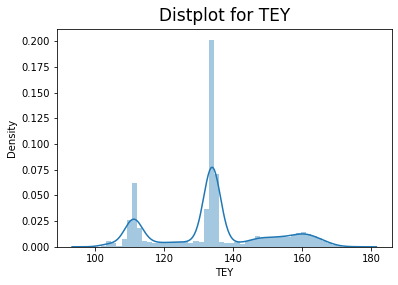

In [10]:

#Target variable
plt.title('Distplot for TEY', fontsize=17, y = 1.01)
sns.distplot(df['TEY'])

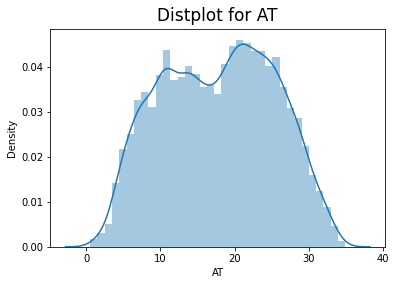

In [11]:
plt.title('Distplot for AT', fontsize=17, y = 1.01)
sns.distplot(df['AT'])

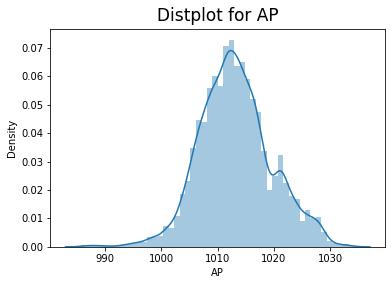

In [12]:
plt.title('Distplot for AP', fontsize=17, y = 1.01)
sns.distplot(df['AP'])

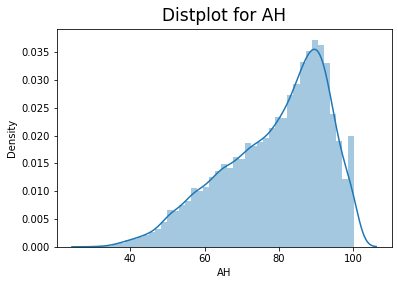

In [13]:
plt.title('Distplot for AH', fontsize=17, y = 1.01)
sns.distplot(df['AH'])

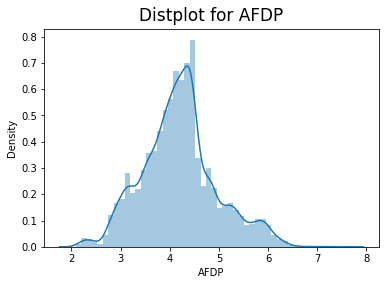

In [14]:
plt.title('Distplot for AFDP', fontsize=17, y = 1.01)
sns.distplot(df['AFDP'])

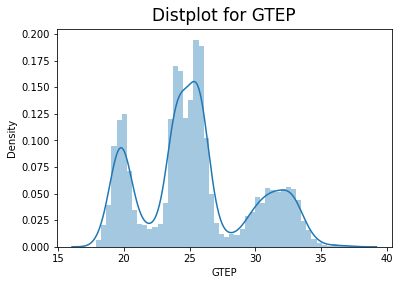

In [15]:
plt.title('Distplot for GTEP', fontsize=17, y = 1.01)
sns.distplot(df['GTEP'])

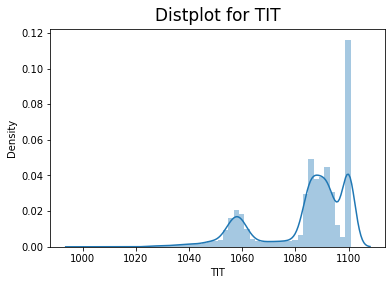

In [16]:
plt.title('Distplot for TIT', fontsize=17, y = 1.01)
sns.distplot(df['TIT'])

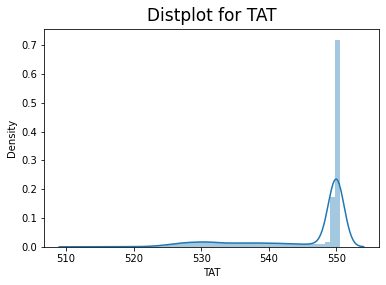

In [17]:
plt.title('Distplot for TAT', fontsize=17, y = 1.01)
sns.distplot(df['TAT'])

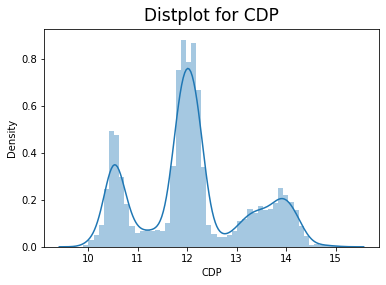

In [18]:
plt.title('Distplot for CDP', fontsize=17, y = 1.01)
sns.distplot(df['CDP'])

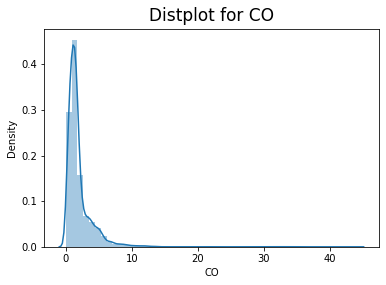

In [19]:
plt.title('Distplot for CO', fontsize=17, y = 1.01)
sns.distplot(df['CO'])

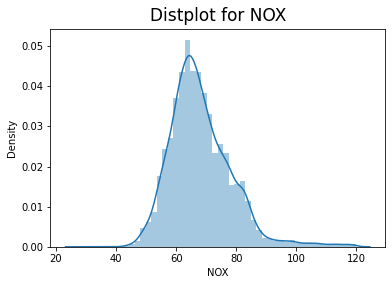

In [20]:
plt.title('Distplot for NOX', fontsize=17, y = 1.01)
sns.distplot(df['NOX'])

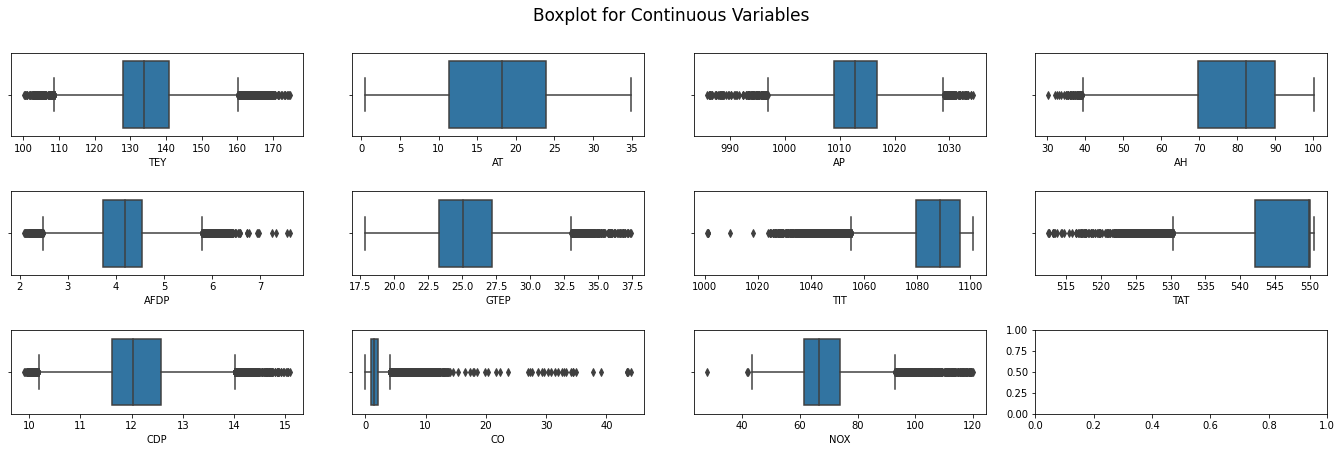

In [21]:
#check for outliers
fig, ax=plt.subplots(3,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(df.TEY, ax=ax[0,0])
sns.boxplot(df.AT, ax=ax[0,1])
sns.boxplot(df.AP, ax=ax[0,2])
sns.boxplot(df.AH, ax=ax[0,3])
sns.boxplot(df.AFDP, ax=ax[1,0])
sns.boxplot(df.GTEP, ax=ax[1,1])
sns.boxplot(df.TIT, ax=ax[1,2])
sns.boxplot(df.TAT, ax=ax[1,3])
sns.boxplot(df.CDP, ax=ax[2,0])
sns.boxplot(df.CO, ax=ax[2,1])
sns.boxplot(df.NOX, ax=ax[2,2])
plt.suptitle("Boxplot for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

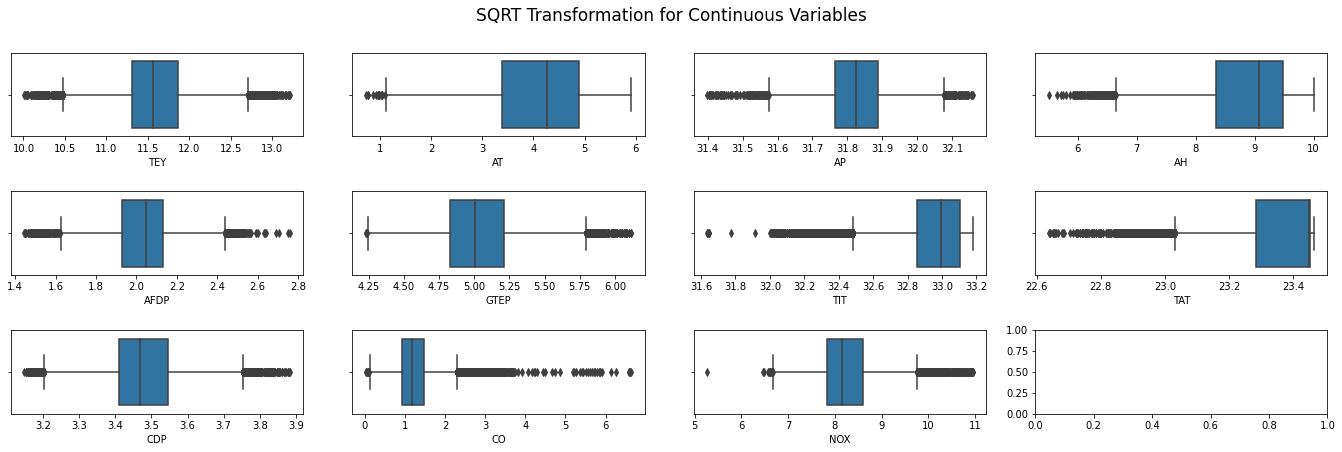

In [22]:
import numpy as np
fig, ax=plt.subplots(3,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.sqrt(df.TEY), ax=ax[0,0])
sns.boxplot(np.sqrt(df.AT), ax=ax[0,1])
sns.boxplot(np.sqrt(df.AP), ax=ax[0,2])
sns.boxplot(np.sqrt(df.AH), ax=ax[0,3])
sns.boxplot(np.sqrt(df.AFDP), ax=ax[1,0])
sns.boxplot(np.sqrt(df.GTEP), ax=ax[1,1])
sns.boxplot(np.sqrt(df.TIT), ax=ax[1,2])
sns.boxplot(np.sqrt(df.TAT), ax=ax[1,3])
sns.boxplot(np.sqrt(df.CDP), ax=ax[2,0])
sns.boxplot(np.sqrt(df.CO), ax=ax[2,1])
sns.boxplot(np.sqrt(df.NOX), ax=ax[2,2])
plt.suptitle("SQRT Transformation for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

In [23]:
corr = pd.DataFrame(data = df.corr().iloc[:,7], index=df.columns)
corr = corr.sort_values(by='TEY', ascending=False)
corr

,TEY
TEY,1.000000
CDP,0.988473
GTEP,0.977042
TIT,0.891587
AFDP,0.717995
AP,0.146939
NOX,-0.102631
AH,-0.110272
AT,-0.207495
CO,-0.541751


Text(0.5, 1.0, 'Correlation Map of variables')

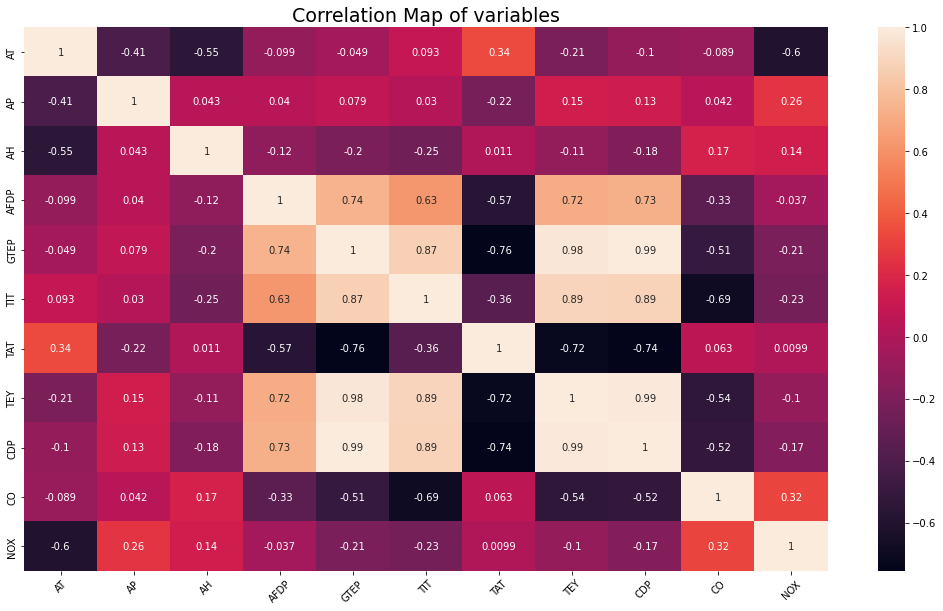

In [24]:
fig= plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(), annot=True);
plt.xticks(rotation=45)
plt.title("Correlation Map of variables", fontsize=19)

In [25]:
!pip install ppscore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13167 sha256=0d5d39c4d862deec8848bd6d19abe46c1b256cd70034ba681511291a85e8e11b
  Stored in directory: /root/.cache/pip/wheels/df/f9/57/05d08363f49803608cd482928dce0a93d3aedcaddd3007c97d
Successfully built ppscore


In [26]:
import ppscore as PPS
score = PPS.matrix(df)
score_s = score[score['y']=='TEY']
score_s.sort_values(by="ppscore", ascending=False)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
84,TEY,TEY,1.000000,predict_itself,True,None,0.000000,1.000000,None
95,CDP,TEY,0.872285,regression,True,mean absolute error,11.172076,1.426840,DecisionTreeRegressor()
51,GTEP,TEY,0.832336,regression,True,mean absolute error,11.172076,1.873154,DecisionTreeRegressor()
62,TIT,TEY,0.766040,regression,True,mean absolute error,11.172076,2.613821,DecisionTreeRegressor()
73,TAT,TEY,0.226050,regression,True,mean absolute error,11.172076,8.646631,DecisionTreeRegressor()
40,AFDP,TEY,0.152509,regression,True,mean absolute error,11.172076,9.468234,DecisionTreeRegressor()
106,CO,TEY,0.055869,regression,True,mean absolute error,11.172076,10.547906,DecisionTreeRegressor()
7,AT,TEY,0.000000,regression,True,mean absolute error,11.172076,16.007470,DecisionTreeRegressor()
18,AP,TEY,0.000000,regression,True,mean absolute error,11.172076,12.475617,DecisionTreeRegressor()
29,AH,TEY,0.000000,regression,True,mean absolute error,11.172076,16.950976,DecisionTreeRegressor()


In [27]:
#reset index after dropping outliers
df = df.reset_index()
df = df.drop('index', axis = 1)
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [28]:
df = df.drop(['AT', 'AP', 'AH', 'NOX'], axis=1)

In [29]:
df.shape

(15039, 7)

Converting independent features into normalised and standardized data

In [30]:
#Standardize & Normalize the data
norm = MinMaxScaler()
std = StandardScaler()

df_norm = pd.DataFrame(norm.fit_transform(df), columns=df.columns)            #data between -3 to +3
df_std = pd.DataFrame(std.fit_transform(df), columns=df.columns)

In [31]:
#we will take a small model as this is large data and will take huge amount of time to build model
#to reandomly shuffle and select a % of data
temp = df_std.sample(frac=1)          #shuffle all the data
temp_s = df_std.sample(frac=0.1)      #shuffle and select only 10% of the data randomly to train
temp_s

,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
11432,-0.671157,-0.084351,0.284453,0.604308,0.018418,-0.129041,-0.400786
14352,1.356807,1.644060,0.986324,-2.063955,1.528918,1.690278,-0.712347
1913,0.967553,-0.051527,0.266301,0.578884,0.038633,-0.115444,-0.300117
2199,1.289717,-0.069496,0.211846,0.587783,-0.047916,-0.133573,-0.186037
4457,-0.306765,-0.644036,-0.562632,0.554731,-0.659444,-0.701034,2.121611
...,...,...,...,...,...,...,...
12609,-0.143776,0.168178,0.695895,0.586511,-0.028331,0.188230,-0.238419
13701,0.906382,1.353675,0.998425,-1.674965,1.413309,1.541615,-0.356819
8519,1.469676,1.706833,0.974223,-2.063955,1.660953,1.690278,-0.053417
670,2.469056,1.830701,0.980273,-2.119888,1.763927,1.720193,-0.640281


Splitting data into target variable and independent variable

In [32]:
x = temp_s.drop('TEY', axis=1)
y = temp_s['TEY']
x


,AFDP,GTEP,TIT,TAT,CDP,CO
11432,-0.671157,-0.084351,0.284453,0.604308,-0.129041,-0.400786
14352,1.356807,1.644060,0.986324,-2.063955,1.690278,-0.712347
1913,0.967553,-0.051527,0.266301,0.578884,-0.115444,-0.300117
2199,1.289717,-0.069496,0.211846,0.587783,-0.133573,-0.186037
4457,-0.306765,-0.644036,-0.562632,0.554731,-0.701034,2.121611
...,...,...,...,...,...,...
12609,-0.143776,0.168178,0.695895,0.586511,0.188230,-0.238419
13701,0.906382,1.353675,0.998425,-1.674965,1.541615,-0.356819
8519,1.469676,1.706833,0.974223,-2.063955,1.690278,-0.053417
670,2.469056,1.830701,0.980273,-2.119888,1.720193,-0.640281


Creating train and test data for model validation

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [34]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1128, 6), (376, 6), (1128,), (376,))

Build a Model

In [35]:
# Importing the necessary packages
import tensorflow as tf
import keras
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
tf.config.experimental.list_physical_devices('GPU')   

[]

In [36]:
# create model with 2 hidden layers
def create_model_two_hidden_layers():
    model = Sequential()
    model.add(Dense(5, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))
    
    adam=Adam(lr=0.001)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model

In [37]:
model1 = create_model_two_hidden_layers()
print("Here is the summary of the model:")
model1.summary()

Here is the summary of the model:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 35        
                                                                 
 dense_1 (Dense)             (None, 6)                 36        
                                                                 
 dense_2 (Dense)             (None, 10)                70        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________


In [38]:
#create a model with 3 hidden layers
def create_model_three_hidden_layers():
    model = Sequential()
    model.add(Dense(32, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(32, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))
    
    adam=Adam(lr=0.01)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model


In [39]:
model2 = create_model_three_hidden_layers()
print("Here is the summary of the model2:")
model2.summary()

Here is the summary of the model2:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                224       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 11,841
Trainable params: 11,841
Non-trainable params: 0
_________________________________________________________________


In [41]:
%%time
epochs=500
batch_size=50

print("Here is the summary of this model:")
model2.summary()

with tf.device('/GPU:0'):
  model2.fit(x_train,y_train, verbose = 0,batch_size = batch_size,epochs = epochs, shuffle=True)


Here is the summary of this model:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                224       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 11,841
Trainable params: 11,841
Non-trainable params: 0
_________________________________________________________________
CPU times: user

In [42]:
print("Predicted values:")
model2.predict(x_test[:10])

Predicted values:
1/1 [==============================] - 0s 105ms/step


array([[-1.9285142e-02],
       [ 8.0737025e-03],
       [ 1.0366468e+00],
       [ 1.3210051e+00],
       [ 1.7663487e+00],
       [ 1.5245378e-04],
       [-6.3404813e-02],
       [-1.5998590e+00],
       [-8.6438701e-02],
       [ 5.7912171e-01]], dtype=float32)

In [43]:
print('Actual values')
y_test[:10]

Actual values


10797   -0.023909
6871    -0.035281
11134    0.991935
1774     1.324865
14291    1.739289
7446     0.015259
2542    -0.048547
6711    -1.602006
14096   -0.155944
4084     0.415785
Name: TEY, dtype: float64

In [44]:

loss, mae, mse, mape = model2.evaluate(x_train, y_train)
print('\n', "Results for model 2:", '\n', "Training Loss:", loss, '\n', "Training Mean Absolute Error:" , mae, '\n', "Training Mean Squared Error:", mse)


36/36 [==============================] - 0s 2ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0426 - mape: 102.4049

 Results for model 2: 
 Training Loss: 0.0033761162776499987 
 Training Mean Absolute Error: 0.0033761162776499987 
 Training Mean Squared Error: 0.04257228597998619


In [45]:
loss, mae, mse, mape = model2.evaluate(x_test, y_test)
print('\n', "Results for model 2:", '\n', "Test Loss:", loss, '\n', "Test Mean Absolute Error:" , mae, '\n', "Test Mean Squared Error:", mse)



12/12 [==============================] - 0s 2ms/step - loss: 0.0070 - mse: 0.0070 - mae: 0.0582 - mape: 55.2946

 Results for model 2: 
 Test Loss: 0.007017286028712988 
 Test Mean Absolute Error: 0.007017286028712988 
 Test Mean Squared Error: 0.05819271504878998


In [46]:


# Create the model
#get best value for batch size and epochs by hyperparameter tuning
model = KerasRegressor(build_fn = create_model_three_hidden_layers,verbose = 0)
# Define the grid search parameters
batch_size = [30,50,70]
epochs = [300,500,800]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=30, epochs=300...................................
[CV 1/5; 1/9] END ...batch_size=30, epochs=300;, score=-0.021 total time=  21.4s
[CV 2/5; 1/9] START batch_size=30, epochs=300...................................
[CV 2/5; 1/9] END ...batch_size=30, epochs=300;, score=-0.010 total time=  21.4s
[CV 3/5; 1/9] START batch_size=30, epochs=300...................................
[CV 3/5; 1/9] END ...batch_size=30, epochs=300;, score=-0.009 total time=  18.2s
[CV 4/5; 1/9] START batch_size=30, epochs=300...................................
[CV 4/5; 1/9] END ...batch_size=30, epochs=300;, score=-0.005 total time=  21.4s
[CV 5/5; 1/9] START batch_size=30, epochs=300...................................
[CV 5/5; 1/9] END ...batch_size=30, epochs=300;, score=-0.013 total time=  18.1s
[CV 1/5; 2/9] START batch_size=30, epochs=500...................................
[CV 1/5; 2/9] END ...batch_size=30, epochs=500;, 

In [47]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.0077545459382236, using {'batch_size': 50, 'epochs': 300}
-0.011665598675608634,0.005153241385994479 with: {'batch_size': 30, 'epochs': 300}
-0.008651425875723363,0.002062197669900207 with: {'batch_size': 30, 'epochs': 500}
-0.009893047250807285,0.0024323065764830024 with: {'batch_size': 30, 'epochs': 800}
-0.0077545459382236,0.0022829249824829405 with: {'batch_size': 50, 'epochs': 300}
-0.01051175119355321,0.006051403522388349 with: {'batch_size': 50, 'epochs': 500}
-0.009426603000611067,0.0030613508302278934 with: {'batch_size': 50, 'epochs': 800}
-0.008863503951579333,0.0010030357067961418 with: {'batch_size': 70, 'epochs': 300}
-0.007814965955913068,0.0012371738706462197 with: {'batch_size': 70, 'epochs': 500}
-0.008897794969379902,0.003471464711809007 with: {'batch_size': 70, 'epochs': 800}


In [50]:
#get best value for learning rate and dropuout by hyperparameter tuning

# Defining the model
%%time
def create_model_three_hidden_layers(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(32,input_dim = 6,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(128,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'mse', optimizer = adam,metrics = ['mse', 'mae', 'mape'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model_three_hidden_layers,verbose = 0,batch_size = 70,epochs = 300)

# Define the grid search parameters
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 0)
grid_result = grid.fit(x_train,y_train)


CPU times: user 10min 2s, sys: 32.8 s, total: 10min 35s
Wall time: 9min 36s
CPU times: user 9min 43s, sys: 32.4 s, total: 10min 16s
Wall time: 9min 2s


In [51]:
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 0)
grid_result = grid.fit(x_train,y_train)

In [ ]:
# Defining the model
#get best value for kernel initializer and activation func by hyperparameter tuning
%%time
def create_model_three_hidden_layers(activation_function,init):
    model = Sequential()
    model.add(Dense(32,input_dim = 6,kernel_initializer = init,activation = activation_function))

    model.add(Dense(32,kernel_initializer = init,activation = activation_function))
    
    model.add(Dense(64,kernel_initializer = init,activation = activation_function))
    
    model.add(Dense(128,kernel_initializer = init,activation = activation_function))
    
    model.add(Dense(1))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'mse',optimizer = adam,metrics = ['mse', 'mae', 'mape'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model_three_hidden_layers,verbose = 0,batch_size = 70,epochs = 300)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 0)
grid_result = grid.fit(x_train,y_train)

CPU times: user 13min 16s, sys: 52.9 s, total: 14min 9s
Wall time: 12min 14s


In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

In [ ]:
# Defining the model
#get best value for neuron by hyperparameter tuning
%%time
def create_model_three_hidden_layers(neuron1,neuron2,neuron3,neuron4):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 6,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(neuron3,input_dim = neuron2,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(neuron4,input_dim = neuron3,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(1))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'mse',optimizer = adam,metrics = ['mse', 'mae', 'mape'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model_three_hidden_layers,verbose = 0,batch_size = 70,epochs = 300)

# Define the grid search parameters

neuron1 = [8,16,32]
neuron2 = [32,64,128]
neuron3 = [32,64,128]
neuron4 = [32,64,128]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2, neuron3 = neuron3, neuron4 = neuron4)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 0)
grid_result = grid.fit(x_train,y_train)

CPU times: user 1h 26min 36s, sys: 5min 48s, total: 1h 32min 24s
Wall time: 1h 17min 46s


In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.006371263787150383, using {'neuron1': 16, 'neuron2': 128, 'neuron3': 32, 'neuron4': 32}
-0.00801448430866003,0.001484380979932281 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 32, 'neuron4': 32}
-0.007658365834504366,0.0005698291228131978 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 32, 'neuron4': 64}
-0.008342098817229271,0.00044985519014599225 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 32, 'neuron4': 128}
-0.007881567906588316,0.0008835744455913259 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 64, 'neuron4': 32}
-0.00767604224383831,0.0009719893924880546 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 64, 'neuron4': 64}
-0.008407521340996028,0.001428151484491878 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 64, 'neuron4': 128}
-0.007971039228141307,0.001715783424522165 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 128, 'neuron4': 32}
-0.007657250296324492,0.0009114857735145533 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 128, 'neuron4': 64}
-0.007550700660794973,

In [ ]:
#create a model with 3 hidden layers with best hyperparameters
def create_model_three_hidden_layers():
    model = Sequential()
    model.add(Dense(8, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))
    
    adam=Adam(lr=0.001)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model

In [ ]:
%%time
epochs=300
batch_size=70

final_model=create_model_three_hidden_layers()

print("Here is the summary of our final model:")
final_model.summary()

with tf.device('/GPU:0'):
  final_model.fit(x_train,y_train, verbose = 0,batch_size = batch_size,epochs = epochs, shuffle=True)


Here is the summary of our final model:
Model: "sequential_607"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3034 (Dense)          (None, 8)                 56        
                                                                 
 dense_3035 (Dense)          (None, 128)               1152      
                                                                 
 dense_3036 (Dense)          (None, 64)                8256      
                                                                 
 dense_3037 (Dense)          (None, 128)               8320      
                                                                 
 dense_3038 (Dense)          (None, 1)                 129       
                                                                 
Total params: 17,913
Trainable params: 17,913
Non-trainable params: 0
_________________________________________________________________
CPU time

In [ ]:
ssloss, mae, mse, mape = final_model.evaluate(x_train, y_train)
print('\n', "Results for final model :", '\n', "Training Loss:", loss, '\n', "Training Mean Absolute Error:" , mae, '\n', "Training Mean Squared Error:", mse)


13/13 [==============================] - 0s 1ms/step - loss: nan - mse: nan - mae: nan - mape: nan

 Results for final model : 
 Training Loss: nan 
 Training Mean Absolute Error: nan 
 Training Mean Squared Error: nan


In [ ]:
# Defining the model
#get best value for neuron by hyperparameter tuning
%%time
def create_model_three_hidden_layers(neuron1,neuron2,neuron3,neuron4):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 6,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(neuron3,input_dim = neuron2,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(neuron4,input_dim = neuron3,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(1))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'mse',optimizer = adam,metrics = ['mse', 'mae', 'mape'])
    return model

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.3 µs


In [ ]:
# Create the model

model = KerasRegressor(build_fn = create_model_three_hidden_layers,verbose = 0,batch_size = 70,epochs = 300)

# Define the grid search parameters

neuron1 = [8,16,32]
neuron2 = [32,64,128]
neuron3 = [32,64,128]
neuron4 = [32,64,128]

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : nan, using {'neuron1': 8, 'neuron2': 32, 'neuron3': 32, 'neuron4': 32}
nan,nan with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 32, 'neuron4': 32}
nan,nan with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 32, 'neuron4': 64}
nan,nan with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 32, 'neuron4': 128}
nan,nan with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 64, 'neuron4': 32}
nan,nan with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 64, 'neuron4': 64}
nan,nan with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 64, 'neuron4': 128}
nan,nan with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 128, 'neuron4': 32}
nan,nan with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 128, 'neuron4': 64}
nan,nan with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 128, 'neuron4': 128}
nan,nan with: {'neuron1': 8, 'neuron2': 64, 'neuron3': 32, 'neuron4': 32}
nan,nan with: {'neuron1': 8, 'neuron2': 64, 'neuron3': 32, 'neuron4': 64}
nan,nan with: {'neuron1': 8, 'neuron2': 64, 'neuron3': 32, 'neuron4': 128}
nan,nan with: {'neuron1': 8

In [ ]:
#create a model with 3 hidden layers with best hyperparameters
def create_model_three_hidden_layers():
    model = Sequential()
    model.add(Dense(8, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))
    
    adam=Adam(lr=0.001)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model

In [ ]:
%%time
epochs=300
batch_size=70

final_model=create_model_three_hidden_layers()

print("Here is the summary of our final model:")
final_model.summary()

with tf.device('/GPU:0'):
  final_model.fit(x_train,y_train, verbose = 0,batch_size = batch_size,epochs = epochs, shuffle=True)


Here is the summary of our final model:
Model: "sequential_608"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3039 (Dense)          (None, 8)                 56        
                                                                 
 dense_3040 (Dense)          (None, 128)               1152      
                                                                 
 dense_3041 (Dense)          (None, 64)                8256      
                                                                 
 dense_3042 (Dense)          (None, 128)               8320      
                                                                 
 dense_3043 (Dense)          (None, 1)                 129       
                                                                 
Total params: 17,913
Trainable params: 17,913
Non-trainable params: 0
_________________________________________________________________
CPU time

In [ ]:
loss, mae, mse, mape = final_model.evaluate(x_train, y_train)
print('\n', "Results for final model :", '\n', "Training Loss:", loss, '\n', "Training Mean Absolute Error:" , mae, '\n', "Training Mean Squared Error:", mse)


13/13 [==============================] - 0s 1ms/step - loss: nan - mse: nan - mae: nan - mape: nan

 Results for final model : 
 Training Loss: nan 
 Training Mean Absolute Error: nan 
 Training Mean Squared Error: nan


In [ ]:
loss_t, mae_t, mse_t, mape_t = final_model.evaluate(x_test, y_test)
print('\n', "Results for final model :", '\n', "Test Loss:", loss_t, '\n', "Test Mean Absolute Error:" , mae_t, '\n', "Test Mean Squared Error:", mse_t)


5/5 [==============================] - 0s 2ms/step - loss: nan - mse: nan - mae: nan - mape: nan

 Results for final model : 
 Test Loss: nan 
 Test Mean Absolute Error: nan 
 Test Mean Squared Error: nan


Predicting values from Model using same dataset

Visualizing the Relationship between the Actual and Predicted Values Model Validation

## 2) data set : forestfire

In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv('/content/forestfires.csv')
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


## EDA

In [ ]:
data.shape

(509, 31)

In [ ]:
data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [ ]:
data.describe

<bound method NDFrame.describe of     month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...        

In [ ]:
data[data.duplicated()].shape

(8, 31)

In [ ]:
data[data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [ ]:
import matplotlib.pyplot as plt

## Visualization

In [ ]:
import seaborn as sns

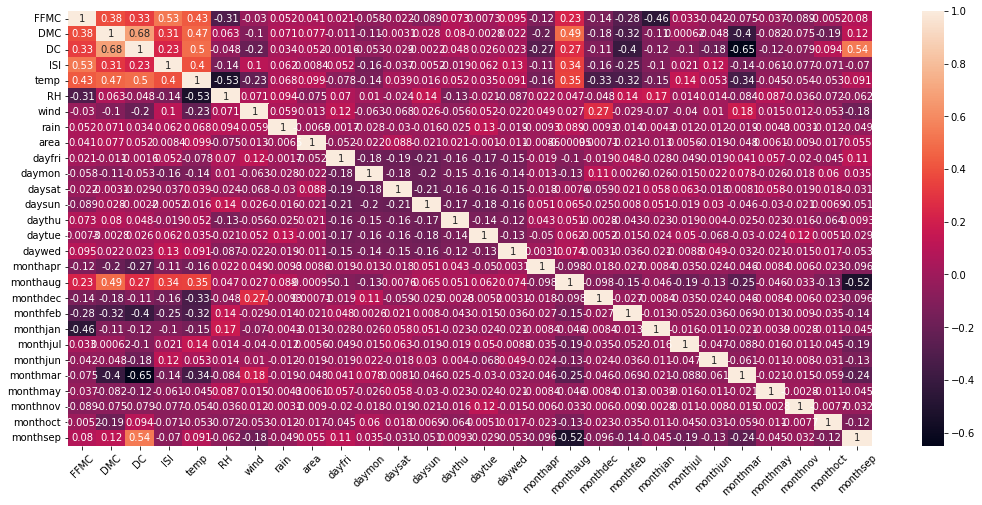

In [ ]:
fig= plt.figure(figsize=(18, 8))
sns.heatmap(data.corr(), annot=True);
plt.xticks(rotation=45)
plt.show()

In [ ]:
sns.set_style('darkgrid')
sns.pairplot(data, hue='size_category')
plt.show()

In [ ]:
data=data.drop(['month','day'],axis=1)

In [ ]:
mapping = {'small': 1, 'large': 2}

In [ ]:
data = data.replace(mapping)

In [ ]:
x = np.array(data.iloc[:,0:28])
y = np.array(data.iloc[:,28])

In [ ]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
x_norm = norm_func(x)

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x_norm,y, test_size=0.2,stratify = y)
model = Sequential()
model.add(Dense(8, input_dim=28, activation='linear'))
model.add(Dense(4,  activation='tanh'))
model.add(Dense(1,  activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(x_train, y_train, validation_split=0.3, epochs=120, batch_size=10)


Epoch 1/120
29/29 [==============================] - 1s 6ms/step - loss: 0.9322 - accuracy: 0.0865 - val_loss: 0.8371 - val_accuracy: 0.1452
Epoch 2/120
29/29 [==============================] - 0s 2ms/step - loss: 0.7413 - accuracy: 0.2180 - val_loss: 0.6459 - val_accuracy: 0.4758
Epoch 3/120
29/29 [==============================] - 0s 2ms/step - loss: 0.5680 - accuracy: 0.7163 - val_loss: 0.4664 - val_accuracy: 0.6935
Epoch 4/120
29/29 [==============================] - 0s 2ms/step - loss: 0.4036 - accuracy: 0.7474 - val_loss: 0.2927 - val_accuracy: 0.6935
Epoch 5/120
29/29 [==============================] - 0s 2ms/step - loss: 0.2479 - accuracy: 0.7474 - val_loss: 0.1283 - val_accuracy: 0.6935
Epoch 6/120
29/29 [==============================] - 0s 2ms/step - loss: 0.0984 - accuracy: 0.7474 - val_loss: -0.0265 - val_accuracy: 0.6935
Epoch 7/120
29/29 [==============================] - 0s 2ms/step - loss: -0.0386 - accuracy: 0.7474 - val_loss: -0.1813 - val_accuracy: 0.6935
Epoch 8/12

In [ ]:
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

13/13 [==============================] - 0s 1ms/step - loss: -4.4990 - accuracy: 0.7312
accuracy: 73.12%


In [ ]:
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4/4 [==============================] - 0s 2ms/step - loss: -4.5067 - accuracy: 0.7308
accuracy: 73.08%
